# Problem Statement

Predict the count of bike registered based on temp. Dataset is taken from https://www.kaggle.com/noordeen/bikeshare-data 

In [146]:
#preprocessing libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modelling and metrics libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("bike_Share.csv")
data_orig = data.copy()
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.shape

(10886, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [11]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [12]:
data.index

RangeIndex(start=0, stop=10886, step=1)

In [14]:
data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

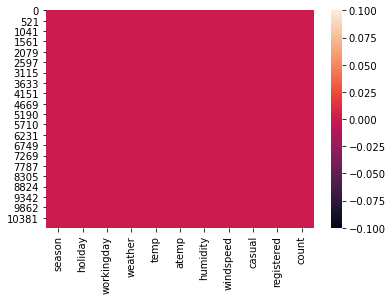

In [123]:
sns.heatmap(data.isna())

In [124]:
data.skew()

season       -0.007789
holiday       5.654555
workingday   -0.775390
weather       1.242621
temp          0.003594
atemp        -0.102833
humidity     -0.084507
windspeed     0.588771
casual        2.493620
registered    1.523959
count         1.240894
dtype: float64

In [16]:
data.duplicated().value_counts()

False    10865
True        21
dtype: int64

In [17]:
data[data.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
190,1,0,0,1,3.28,4.545,53,12.9980,0,1,1
434,1,0,1,2,6.56,11.365,69,0.0000,0,2,2
504,1,0,1,2,5.74,8.335,63,7.0015,0,1,1
554,1,0,0,1,10.66,12.880,60,15.0013,0,1,1
858,1,0,0,1,16.40,20.455,15,22.0028,0,3,3
1185,1,0,1,1,10.66,14.395,65,6.0032,0,1,1
1545,2,0,0,2,14.76,18.180,93,6.0032,0,4,4
4682,4,0,1,1,12.30,16.665,87,0.0000,0,4,4
5089,4,0,1,2,18.86,22.725,87,12.9980,0,3,3
5188,4,0,0,1,9.84,12.880,65,7.0015,1,10,11


In [18]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10865.0,2.507225,1.115713,1.00,2.0000,3.000,4.0000,4.0000
holiday,10865.0,0.028624,0.166755,0.00,0.0000,0.000,0.0000,1.0000
workingday,10865.0,0.680718,0.466220,0.00,0.0000,1.000,1.0000,1.0000
weather,10865.0,1.418776,0.634125,1.00,1.0000,1.000,2.0000,4.0000
temp,10865.0,20.245132,7.786636,0.82,13.9400,20.500,26.2400,41.0000
atemp,10865.0,23.669358,8.470159,0.76,16.6650,24.240,31.0600,45.4550
humidity,10865.0,61.873355,19.243612,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10865.0,12.810235,8.163516,0.00,7.0015,12.998,16.9979,56.9969
casual,10865.0,36.091210,49.983868,0.00,4.0000,17.000,49.0000,367.0000
registered,10865.0,155.846111,151.036698,0.00,37.0000,119.000,223.0000,886.0000


In [25]:
data.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [32]:
[print(data[i].value_counts(),"\n") for i in data.columns if data[i].nunique()<20]

3    2731
2    2730
4    2728
1    2676
Name: season, dtype: int64 

0    10554
1      311
Name: holiday, dtype: int64 

1    7396
0    3469
Name: workingday, dtype: int64 

1    7176
2    2829
3     859
4       1
Name: weather, dtype: int64 



[None, None, None, None]

In [73]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029315,-0.008394,0.008603,0.258008,0.264052,0.189819,-0.147440,0.096536,0.163820,0.163241
holiday,0.029315,1.000000,-0.250650,-0.007172,-0.000020,-0.005512,0.002048,0.008190,0.043584,-0.021311,-0.005743
workingday,-0.008394,-0.250650,1.000000,0.033854,0.030122,0.024722,-0.011607,0.014285,-0.319295,0.120018,0.011967
weather,0.008603,-0.007172,0.033854,1.000000,-0.055684,-0.056001,0.406642,0.007071,-0.136453,-0.110057,-0.129427
temp,0.258008,-0.000020,0.030122,-0.055684,1.000000,0.984920,-0.065301,-0.018937,0.466756,0.317530,0.393577
atemp,0.264052,-0.005512,0.024722,-0.056001,0.984920,1.000000,-0.043934,-0.058440,0.461769,0.313697,0.389005
humidity,0.189819,0.002048,-0.011607,0.406642,-0.065301,-0.043934,1.000000,-0.317920,-0.348238,-0.265321,-0.317337
windspeed,-0.147440,0.008190,0.014285,0.007071,-0.018937,-0.058440,-0.317920,1.000000,0.091474,0.089907,0.100212
casual,0.096536,0.043584,-0.319295,-0.136453,0.466756,0.461769,-0.348238,0.091474,1.000000,0.496587,0.690036
registered,0.163820,-0.021311,0.120018,-0.110057,0.317530,0.313697,-0.265321,0.089907,0.496587,1.000000,0.970890


In [114]:
data.corr()[['registered']].T

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
registered,0.16382,-0.021311,0.120018,-0.110057,0.31753,0.313697,-0.265321,0.089907,0.496587,1.0,0.97089


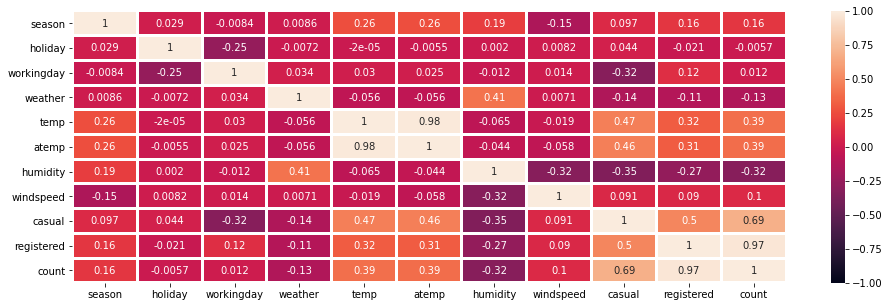

In [83]:
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(),annot=True,fmt='.2g',linewidths=2, vmin=-1, vmax=1)#,cmap='YlGnBu'
plt.show()

In [145]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    if  data[col_name].nunique()>20:
        print("*"*10)
        print(col_name)
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1

        low = q1-1.5*iqr
        high = q3+1.5*iqr
        out = data.loc[(data[col_name] < low) | (data[col_name] > high), col_name]
        cnt_out = out.count()
        tot_obs = data.shape[0]
        per = round((cnt_out/tot_obs)*100,2)
        print("Outliers = ",cnt_out,"out of",tot_obs,"observations ->",per,"%\n",out)

**********
temp
Outliers =  0 out of 10865 observations -> 0.0 %
 Series([], Name: temp, dtype: float64)
**********
atemp
Outliers =  0 out of 10865 observations -> 0.0 %
 Series([], Name: atemp, dtype: float64)
**********
humidity
Outliers =  22 out of 10865 observations -> 0.2 %
 1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64
**********
windspeed
Outliers =  227 out of 10865 observations -> 2.09 %
 175      32.9975
178      36.9974
194      35.0008
196      35.0008
265      39.0007
          ...   
10013    32.9975
10154    32.9975
10263    43.0006
10540    32.9975
10853    32.9975
Name: windspeed, Length: 227, dtype: float64
**********
casual
Outliers =  749 out of 10865 observations -> 6.89 %
 1173     144
1174     149
1175     124
1311     126
1312     174
        ... 
10610    122


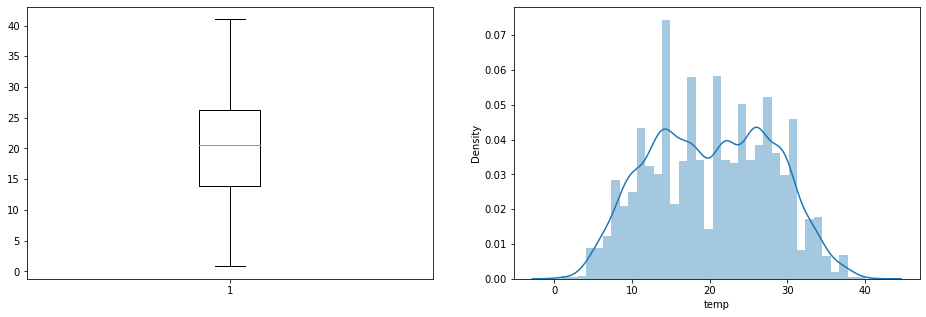

In [72]:
%matplotlib inline
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.boxplot(data['temp'])
plt.subplot(1,2,2)
sns.distplot(data['temp'])
plt.show()

<AxesSubplot:xlabel='temp', ylabel='registered'>

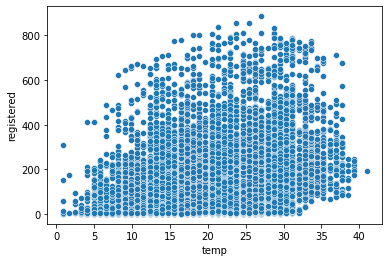

In [85]:
sns.scatterplot(x=data['temp'], y=data['registered'])#,hue=bike['weather'],size=bike['temp'])

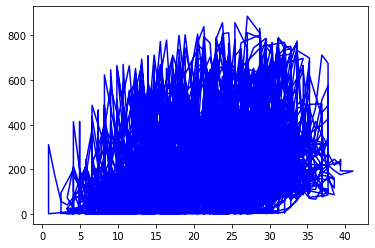

In [88]:
    plt.plot(data["temp"],data["registered"], color='blue')
    #plt.plot(X_train["bmi"],y_train_pred,'r')

In [63]:
def mape(y_act,y_pred):
    #mape = (mean_absolute_error(actual,pred)/actual)*100
    #print("train MAPE: ",mape)
    y_act, y_pred = np.array(y_act), np.array(y_pred)
    return np.mean(np.abs((y_act - y_pred) / y_act)) * 100

In [58]:
def predict_compute(X,y,plt=False):
    display(X.head(),y.head())
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)
    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    print('Co-efficeient:', model.coef_, "\nIntercept:", model.intercept_)
    
    y_train_pred = model.predict(X_train)
    print("*"*30)
    print("train RMSE: ", np.sqrt(mean_squared_error(y_train,y_train_pred)))
    print("train MAE : ", mean_absolute_error(y_train,y_train_pred))
    print("train MAPE: ", mape(y_train,y_train_pred))
    print("train R2  : ",r2_score(y_train,y_train_pred))
    
    y_test_pred = model.predict(X_test)  
    print("*"*30)
    print("test RMSE: ", np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print("test MAE : ", mean_absolute_error(y_test,y_test_pred))
    print("test MAPE: ", mape(y_test,y_test_pred))
    print("test R2  : ",r2_score(y_test,y_test_pred))

In [129]:
X = data[['temp']]
y = data[['registered']]
predict_compute(X,y)

,temp
0,9.84
1,9.02
2,9.02
3,9.84
4,9.84


,registered
0,13
1,32
2,27
3,10
4,1


(7605, 1) (3260, 1) (7605, 1) (3260, 1)
Co-efficeient: [[6.10392722]] 
Intercept: [32.15767967]
******************************
train RMSE:  142.52163059067408
train MAE :  105.40434066960667
train MAPE:  inf
train R2  :  0.10038190623200927
******************************
test RMSE:  144.81756593782305
test MAE :  106.60815769974528
test MAPE:  inf
test R2  :  0.1017736280839393


In [116]:
data.corr()[['count']].T

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,0.163241,-0.005743,0.011967,-0.129427,0.393577,0.389005,-0.317337,0.100212,0.690036,0.97089,1.0


In [115]:
X = data.drop(columns=['casual','registered','count'])
y = data[['count']]
predict_compute(X,y)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0
1,1,0,0,1,9.02,13.635,80,0.0
2,1,0,0,1,9.02,13.635,80,0.0
3,1,0,0,1,9.84,14.395,75,0.0
4,1,0,0,1,9.84,14.395,75,0.0


,count
0,16
1,40
2,32
3,13
4,1


(7605, 8) (3260, 8) (7605, 1) (3260, 1)
Co-efficeient: [[ 23.13978641 -13.51542191   0.94942988   6.20372451   2.2864922
    5.06652321  -3.11342094   0.53734571]] 
Intercept: [143.95087918]
******************************
train RMSE:  154.68778637599073
train MAE :  115.7939186369052
train MAPE:  470.83850491339405
train R2  :  0.26296906240726137
******************************
test RMSE:  158.4072403921264
test MAE :  119.08719388585358
test MAPE:  491.76720452968397
test R2  :  0.2530668885524079


In [148]:
data.corr()[['count']].T

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,0.163241,-0.005743,0.011967,-0.129427,0.393577,0.389005,-0.317337,0.100212,0.690036,0.97089,1.0


In [9]:
import numpy as np
np.log(1), np.log1p(1), np.log(0), np.log1p(0), np.log1p(-1)

<ipython-input-9-5fc700c3ae00>:2: RuntimeWarning: divide by zero encountered in log
  np.log(1), np.log1p(1), np.log(0), np.log1p(0), np.log1p(-1)
<ipython-input-9-5fc700c3ae00>:2: RuntimeWarning: divide by zero encountered in log1p
  np.log(1), np.log1p(1), np.log(0), np.log1p(0), np.log1p(-1)


(0.0, 0.6931471805599453, -inf, 0.0, -inf)